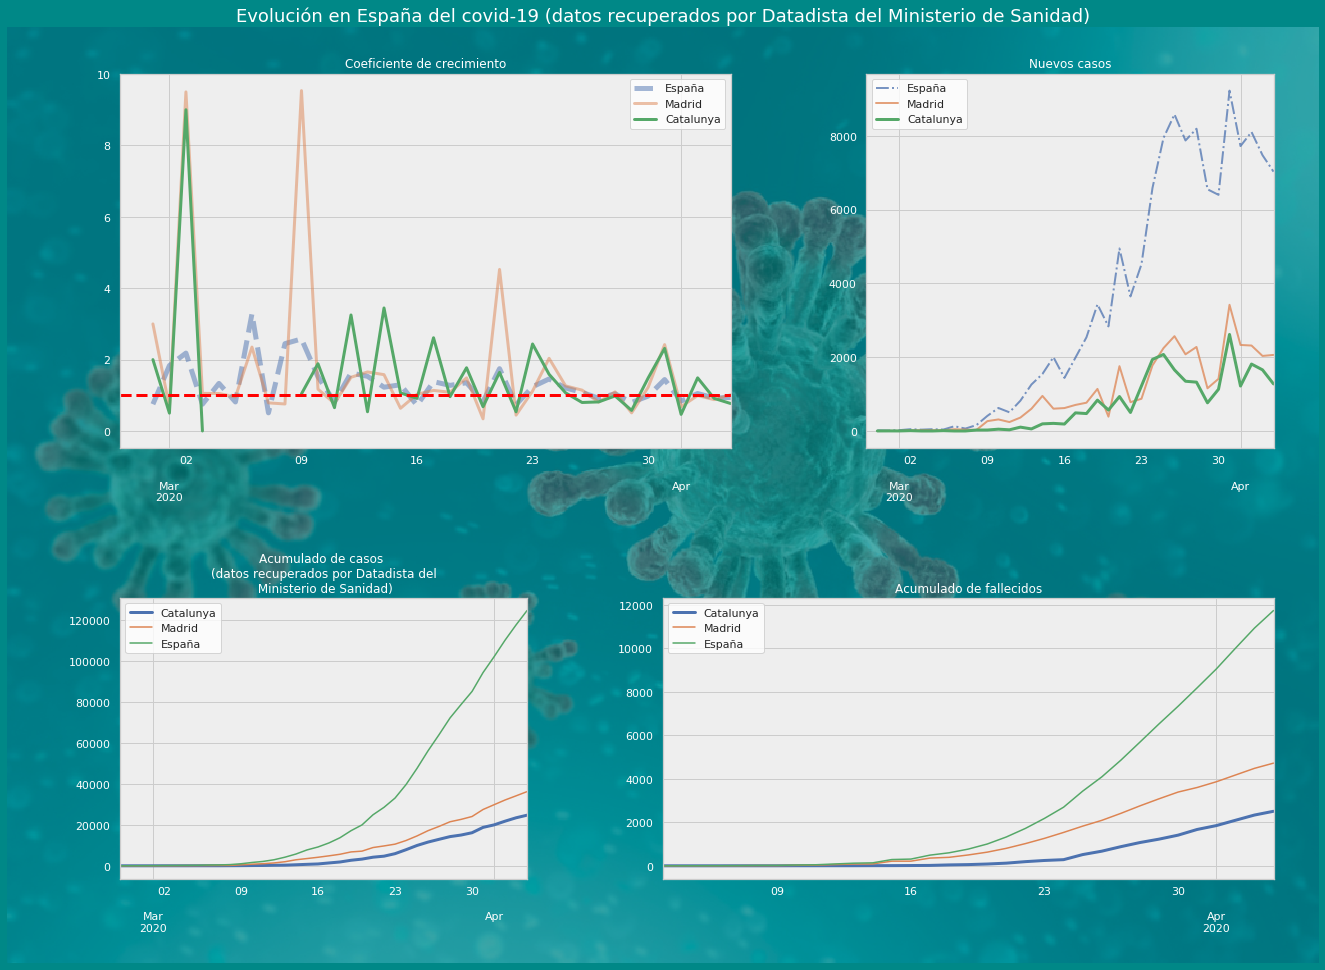

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import sys

hoy     = datetime.date.today()
undia   = datetime.timedelta(days=1)
fichero = hoy.strftime("%Y-%m-%d") 

# Configuración visualización
%matplotlib inline
sns.set()
sns.set(style='whitegrid')
pd.set_option('display.max_row', 1000)

font = {
    'family': 'serif',
    'fontname': 'DejaVu Sans',
    'color':  'white',
    'weight': 'normal',
    'size': 18,
}

fig = plt.figure(figsize=(29 * 0.65, 20 * 0.65), facecolor='#008887')
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Evolución en España del covid-19 (datos recuperados por Datadista del Ministerio de Sanidad)', fontdict=font)
ax.axis('off')
im = plt.imread("covid-19-II.jpg")

implot = plt.imshow(im, origin=[0, 0], alpha=0.3)
plt.xticks([])
plt.yticks([])

url_casos = "https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv"
df_casos = pd.read_csv(url_casos, index_col='CCAA')     
del df_casos['cod_ine']

url_fallecidos = "https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv"
df_fallecidos = pd.read_csv(url_fallecidos, index_col='CCAA')     
del df_fallecidos['cod_ine']

df_casos = df_casos.T
df_casos.reset_index() 
df_casos.index = pd.to_datetime(df_casos.index)

df_fallecidos = df_fallecidos.T
df_fallecidos.reset_index() 
df_fallecidos.index = pd.to_datetime(df_fallecidos.index)

# Calculamos indice de crecimiento España
df_casos_T = df_casos[['Total',]].copy()
df_casos_T['Casos-T[i-1]']    = df_casos_T['Total'].shift(1, axis=0)
df_casos_T['Casos-T[i]']      = df_casos_T['Total'] - df_casos_T['Casos-T[i-1]']
df_casos_T['Casos-T[i][i-1]'] = df_casos_T['Casos-T[i]'].shift(1, axis=0)
df_casos_T['Coeficiente-T']   = df_casos_T['Casos-T[i]'] / df_casos_T['Casos-T[i][i-1]']

# Calculamos indice de crecimiento Catalunya
df_casos_C = df_casos[['Cataluña',]].copy()
df_casos_C['Casos-C[i-1]']    = df_casos_C['Cataluña'].shift(1, axis=0)
df_casos_C['Casos-C[i]']      = df_casos_C['Cataluña'] - df_casos_C['Casos-C[i-1]']
df_casos_C['Casos-C[i][i-1]'] = df_casos_C['Casos-C[i]'].shift(1, axis=0)
df_casos_C['Coeficiente-C']   = df_casos_C['Casos-C[i]'] / df_casos_C['Casos-C[i][i-1]']

# Calculamos indice de crecimiento Madrid
df_casos_M = df_casos[['Madrid',]].copy()
df_casos_M['Casos-M[i-1]']    = df_casos_M['Madrid'].shift(1, axis=0)
df_casos_M['Casos-M[i]']      = df_casos_M['Madrid'] - df_casos_M['Casos-M[i-1]']
df_casos_M['Casos-M[i][i-1]'] = df_casos_M['Casos-M[i]'].shift(1, axis=0)
df_casos_M['Coeficiente-M']   = df_casos_M['Casos-M[i]'] / df_casos_M['Casos-M[i][i-1]']

# a = plt.axes([.2, .6, .2, .1])
a = plt.axes([0.1, 0.09, .3, .3])
#a.set_title('', fontdict=font)
#a.set_title('', fontname='Helvetica')

a.set_title('', color='w')
a.patch.set_facecolor('#eeeeee')
#a.tick_params(axis='x', which='both', colors='red')
#a.tick_params(axis='x', which='major', colors='red')
#a.tick_params(axis='x', which='minor', colors='red')
a.tick_params(which='both', colors='white')

df_casos_C['Cataluña'].plot(title='Acumulado de casos \n(datos recuperados por Datadista del\n Ministerio de Sanidad)', legend=True, label='Catalunya', lw=3)
df_casos_M['Madrid'].plot(legend=True, label='Madrid')
df_casos_T['Total'].plot(legend=True, label='España')

a = plt.axes([0.5, 0.09, 0.45, 0.3])
a.set_title('', color='w')
a.set_facecolor('#eeeeee')
a.tick_params(which='both', colors='white')
#a.tick_params(labelcolor='#dddddd')
df_fallecidos['Cataluña'].plot(title='Acumulado de fallecidos', legend=True, label='Catalunya', lw=3)
df_fallecidos['Madrid'].plot(legend=True, label='Madrid')
df_fallecidos['Total'].plot(legend=True, label='España')

a = plt.axes([0.1, 0.55, 0.45, 0.4])
a.set_title('', color='w')
a.set_facecolor('#eeeeee')
a.tick_params(which='both', colors='white')
df_casos_T['Coeficiente-T'].plot(legend=True, label='España', lw=5, ls='--', alpha=0.5)
df_casos_M['Coeficiente-M'].plot(legend=True, label='Madrid', lw=3, alpha=0.5)
df_casos_C['Coeficiente-C'].plot(title='Coeficiente de crecimiento', legend=True, label='Catalunya', lw=3)
a.axhline(1, color='red',ls='--', lw=3)

a = plt.axes([0.65, 0.55, 0.3, 0.4])
a.set_title('', color='w')
a.set_facecolor('#eeeeee')
a.tick_params(which='both', colors='white')
df_casos_T['Casos-T[i]'].plot(legend=True, label='España', lw=2, ls='-.', alpha=0.75)
df_casos_M['Casos-M[i]'].plot(legend=True, label='Madrid', lw=2, alpha=0.75)
df_casos_C['Casos-C[i]'].plot(title='Nuevos casos', legend=True, label='Catalunya', lw=3)
